<a href="https://colab.research.google.com/github/laprass/drive/blob/main/Project1_AI_02_%EB%B0%95%ED%83%9C%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Install

In [ ]:
pip install QuantStats

In [ ]:
pip install quandl

In [ ]:
pip install yfinance

In [ ]:
pip install finance-datareader

# Setting

In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 금융분석 라이브러리
import FinanceDataReader as fdr
import yfinance as yf #주가데이터 API
import quantstats as qs #포트폴리오 분석
import quandl #경제지표 API
from datetime import datetime, timedelta
import math

# 코랩 라이브러리
from google.colab import files
from IPython.display import Image

In [ ]:
# 시각화 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [10,6]
# plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore')

In [ ]:
# API_Keys

## 퀸들 API 가이드
qd_documnetation = 'https://docs.quandl.com/' 
## 퀸들 API 인증
quandl.ApiConfig.api_key = "aYzp1wyrzzpdhCgUbzps"

In [ ]:
# 코랩 엑셀 다운로드

# writer = pd.ExcelWriter('price.xlsx')
# a.to_excel(writer)
# writer.save()

# from google.colab import files
# files.download('price.xlsx')

In [ ]:
# 코랩 이미지 업로드

# from google.colab import files
# uploaded = files.upload() # 파일 업로드 기능 실행

# for fn in uploaded.keys(): # 업로드된 파일 정보 출력
#     print('User uploaded file "{name}" with length {length} bytes'.format(
#         name=fn, length=len(uploaded[fn])))

In [ ]:
# 코랩 이미지출력

# from IPython.display import Image
# Image('baseball.jpg')

# Part.1 프로젝트 주제

- 프로젝트 테마 : 금융투자분석
- 프로젝트 대상 : 금융시장 투자상품 (주식, 금, 채권, 대체투자자원 등)
- 프로젝트 주제 : 자산운용사의 투자구성(저위험상품, 중위험상품, 고위험상품)을 데이터를 활용해 구현
- 프로젝트 가설 : 주가데이터와 시장지표를 통한 초과수익(시장이자 이상)은 가능하다.
- 나만의 핵심목표 : 금융라이브러리를 찾아 활용하는 것!

# Part.2 프로젝트 이론

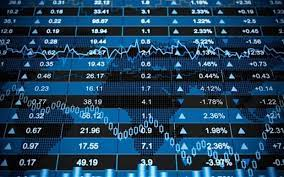

#### 2-1. 퀀트투자란

금융투자를 위해 금융시장을 분석하는 방법으로는 크게 2가지가 있습니다.<br>
바로 '기본적분석'과 '기술적분석' 입니다.

- 기본적분석 (Fundamental Analysis)은 주식의 내재가치(예: 재무재표)를 분석하여 주가를 예측하는 방법 입니다.

- 기술적분석 (Technical Analysis)은 가격, 거래량을 바탕으로 금융시장을 분석하고 예측하려는 시도입니다.

과거부터 있었지만 최근 컴퓨팅자원과 인공지능 기술의 발전으로 폭넓게 사용되기 시작한 분석 방법이 한가지 있습니다.<br>
이번 프로젝트의 주제이기도 한, **"퀀트분석(Quant Analysis)"**입니다.

- 퀀트분석은 시장에서 제공된 객관적인 수치와 지표를 바탕으로 전략을 고안해 투자하는 방식입니다.<br>

**저는 이 퀀트분석을 통해 산술적으로 유의미한 투자전략을 구현하고 테스트해보는 것이 이번 프로젝트의 주요 목표입니다.**

#### 2-2. 포트폴리오 이론(Theory of Portfolio Selection)


<img src="http://www.econovill.com/news/photo/202002/384981_301602_187.png" height="300px" width="700px">

포트폴리오 이론은 "해리 마코위츠(1927~)"에 의해 체계화된 이론으로, <br>
자산을 분산투자하여 포트폴리오를 만들게 되면<br>
분산투자 전보다 위험을 감소시킬 수 있다는 이론입니다.<br>
<br>
현재 금융시장의 대부분의 펀드상품들은 포트폴리오 이론에 기반하여 개발된 상품입니다.<br>
금융시장에는 서로 상반된 움직임을 보여주는 자산들이 있습니다.<br>
대표적인 것이 **"주식-금"** 입니다.<br>
<br>
실제로 저 둘의 가격변동의 상관계수(Correlation Coefficient)는 "0.06"으로 거의 상반된 움직임을 보여줍니다.<br>
<br>
포트폴리오 이론은 이렇게 서로 다른 상관계수를 가진 다양한 금융자산을 조합하여<br>
안정적인 수익을 추구하며 위험을 낮추는 것에 의의가 있습니다.<br>
<br>
프로젝트에서 가장 중점적으로 사용될 핵심이론입니다.<br>

<참고자료><br>
포트폴리오 이론 논문 = https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf




#### 2-3. 가장 훌륭한 금융상품, ETF(Exchange Traded Fund, 상장지수펀드)

<img src="https://blog.kakaocdn.net/dn/q9mSi/btqEeZO3TTQ/gqlC27DDEC0Gzc5KcilhPK/img.png" height="300px" width="300px">

제가 이번 프로젝트에서 주로 활용할 금융상품은 바로 **"ETF(Exchange Traded Fund, 상장지수펀드)"** 입니다.<br>
<br>
ETF는 금융펀드상품의 일종으로 펀드 그 자체가 상장되어 주식처럼 거래되어집니다.<br>
ETF는 다음과 같은 장단점이 있습니다.<br>
<br>
<br>

**1) 장점**<br>
- ETF는 다양한 종목(기업, 채권, 부동산 등)들로 구성되기 때문에 ETF 자체만으로 분산투자의 효과를 갖습니다.
- 따라서, 다수의 금융상품에 분산투자를 원할 경우, ETF를 이용하면 수월하게 자산을 관리 할 수 있습니다.
- 마지막으로 ETF 상품에 편입된 주식이 현금배당을 할 경우, ETF도 같은 비율로 배당을 받을 수 있습니다.

**2) 단점**<br>
- 금융회사에서 관리하는 펀드의 일종이다보니 매년 일정부분의 수수료를 지불해야합니다.
- 실제 상품가치와 ETF의 가치 간에 차이가 발생하는 추적오류(Tracking Error)가 발생합니다.<br>
<br>
<br>
현재 대부분의 헤지펀드들도 수익향상과 위험감소를 위해 ETF를 집중적으로 운용합니다.<br>
마찬가지로 저 역시, 프로젝트에서 ETF를 활용하여 겪는 단점보다<br>
얻는 이점이 더욱 크다고 생각하기 때문에<br>
ETF를 활용하여 투자전략을 구현하고 개발해보겠습니다.<br>





# Part.3 포트폴리오 투자전략 분석
<br>
이번 파트는 3가지 포트폴리오 및 투자전략을 주가데이터를 활용하여 분석해보겠습니다.<br>

## 3-1.  영구 포트폴리오
<br>

**영구 포트폴리오(Permanent Portfolio)란 각 자산의 비율을 변화없이 고정하여 투자**하는 방법을 말합니다.<br>
브릿지워터(Bridgewater Associates)의 펀드매니저 **레이 달리오(Ray Dalio)**가 개발한<br>
**올웨더 포트폴리오(All Weather Portfolio)**가 영구 포트폴리오 방식을 따릅니다.<br>
<br>

올웨더 포트폴리오 투자방법을 데이터분석을 통해 성과를 측정해보겠습니다.<br>
올웨더 포트폴리오의 자산배분비율은 다음과 같습니다.

1. SPY : 30.0% / 미국 주식 ETF
2. TLT : 55.0% / 미국 장기(만기 20년 이상) 국공채 ETF
3. GLD : 7.5% / 금 ETF
4. DBC : 7.5% / 대체자산(원자재) ETF

<img src="https://t1.daumcdn.net/thumb/R720x0.fpng/?fname=http://t1.daumcdn.net/brunch/service/user/2hV3/image/8EdGUJDkG0YsaapmkB0i4iuGkQE.png
" height="400px" width="600px">

<참고자료>

- 영구 포트폴리오 전략 논문 : 
https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf

- 올웨더 포트폴리오 전략 공식자료 : 
https://www.bridgewater.com/research-and-insights/the-all-weather-story

#### 1) 주가데이터를 다운로드 합니다.

In [ ]:
# 먼저 각 종목에 해당하는 데이터를 다운로드합니다.

tickers = ['SPY','TLT','GLD','DBC']
start  = '2006-07-31'
end = '2021-07-31'

## 포트폴리오로 다운로드
all_weather = yf.download(tickers, start=start, end=end, adjusted=True)
all_weather = all_weather.loc[:,['Adj Close']]

[*********************100%***********************]  4 of 4 completed


#### 2) 각 주가데이터의 변동을 확인하기 위해 시각화하였습니다.

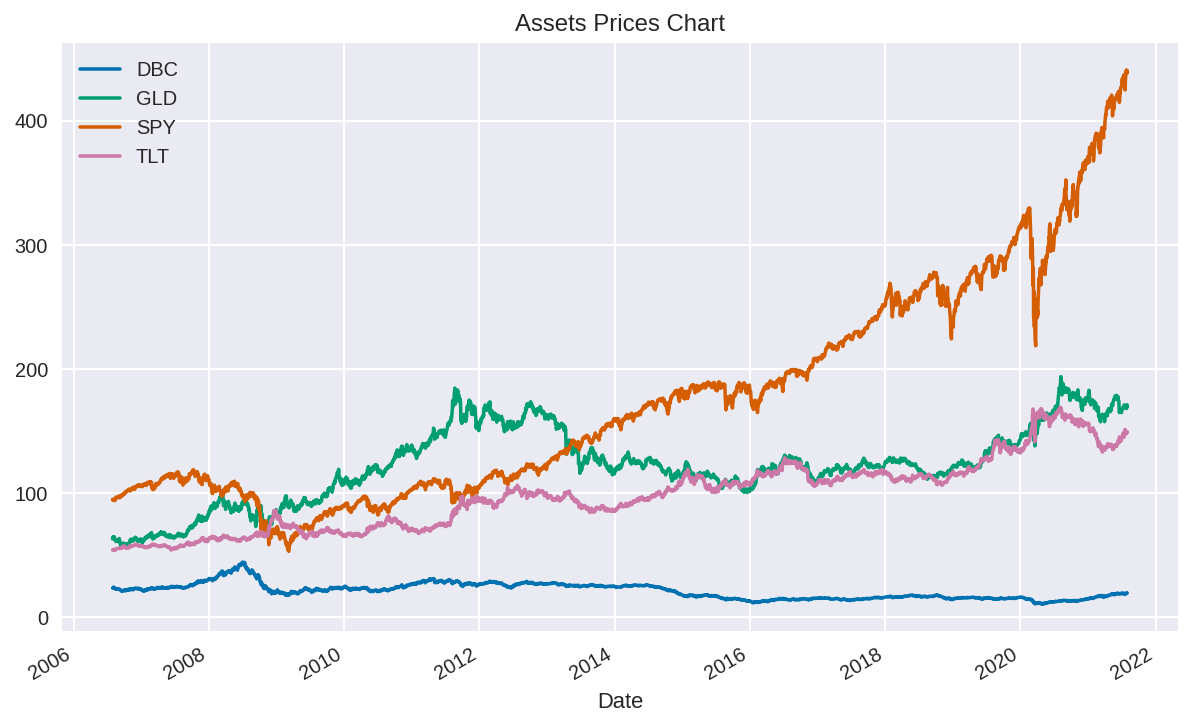

In [ ]:
# 각 자산군의 주가그래프
all_weather['Adj Close'].plot(title='Assets Prices Chart')

#### 3) 포트폴리오 평가분석

In [ ]:
# 개별 자산의 수익률 구하기
return_season = all_weather['Adj Close'].pct_change().dropna()

# 포트폴리오 가중치
# [0.075, 0.075, 0.3, 0.55] 

# 포트폴리오 수익률 계산
return_season['return_season'] = return_season['DBC']*0.075 + return_season['GLD']*0.075 + return_season['SPY'] * 0.30 + return_season['TLT'] * 0.55 

# 포트폴리오 백테스트 레포트 생성
qs.reports.metrics(return_season['return_season'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2006-08-01
End Period                 2021-07-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          247.13%
CAGR%                      8.65%

Sharpe                     1.03
Sortino                    1.49
Sortino/√2                 1.05

Max Drawdown               -14.95%
Longest DD Days            462
Volatility (ann.)          8.39%
Calmar                     0.58
Skew                       -0.28
Kurtosis                   6.62

Expected Daily %           0.03%
Expected Monthly %         0.69%
Expected Yearly %          8.09%
Kelly Criterion            9.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.83%
Expected Shortfall (cVaR)  -0.83%

Gain/Pain Ratio            0.2
Gain/Pain (1M)             1.3

Payoff Ratio               0.98
Profit Factor              1.2
Common Sense Ratio         1.17
CPC Index                  0.

평가시트는 가장 중요한 몇개 항목만 설명을 하겠습니다. <br>
2006년 8월 1일부터 2021년 7월 30일까지 총 15년을 테스트 했습니다.<br>

- Cumulative Returns (누적순수익률) : 투자 원금을 제외하고 복리수익이 원금의 247.13% 입니다.<br>
- CAGR% (연평균수익률) : 연간수익률은 대략 8.65% 입니다.<br>
- Sharpe (샤프지수), 포트폴리오 평가 지표로 리스크대비 수익성을 보여줍니다. 1.03으로 좋은 수치가 나왔습니다.<br>
- Max drawdown(최대손실률) : 해당 포트폴리오는 테스트 기간 동안 최대 -15%의 손실을 기록했습니다.<br>


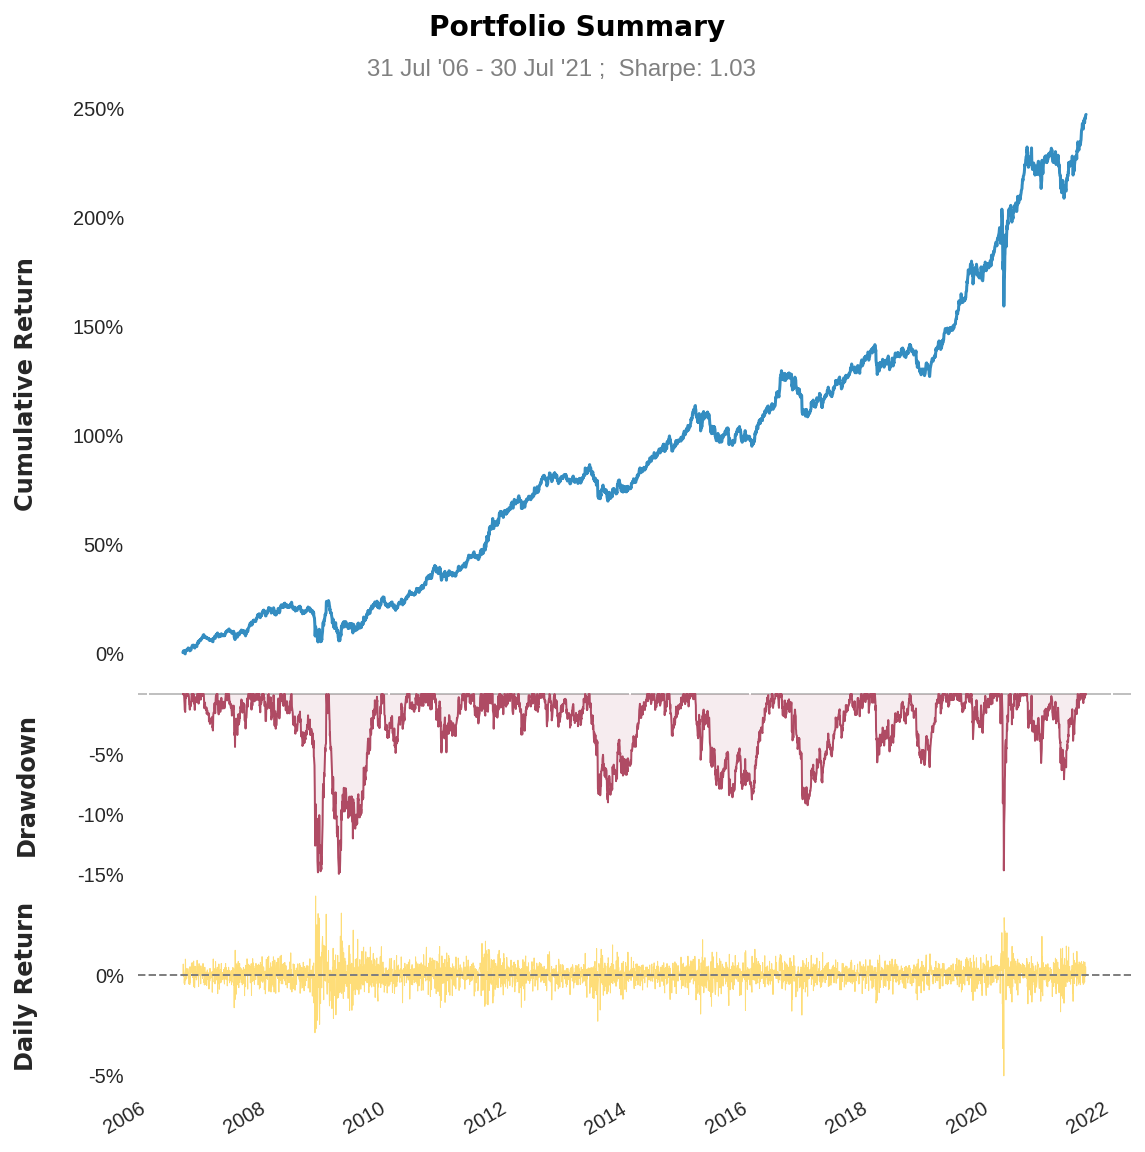

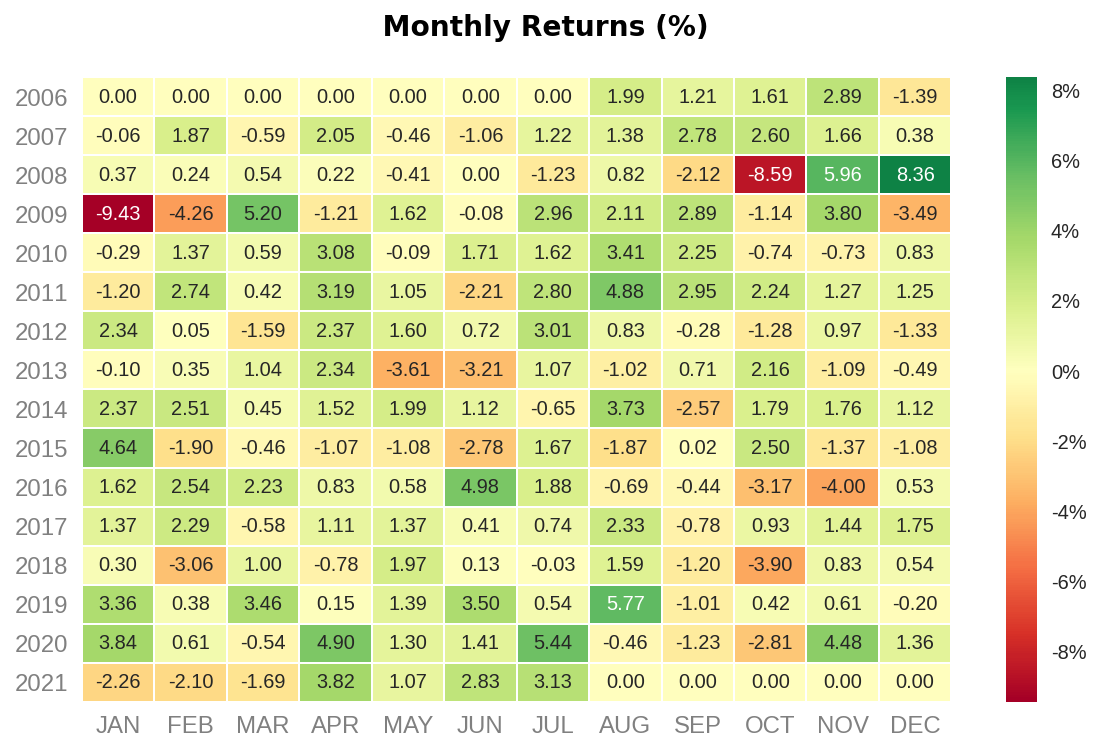

In [ ]:
qs.reports.plots(return_season['return_season'], mode='basic')

#### 4) 몬테카를로 시뮬레이션을 이용한 자산배분비율 탐색

포트폴리오 분석에 사용한 자산배분 비율은 [미국 주식 30%, 국공채 55%, 금 7.5%, 대체자산 7.5%] 입니다.<br>
더 나은 수익률을 얻을 수 있는 비율을 찾기 위한 시뮬레이션 분석을 시도하겠습니다.

**몬테카를로(Monte Carlo) 알고리즘을 이용해 많은 무작위난수를 생성하고<br>
대입하여 포트폴리오 이론의 효율적 경계선(Efficient Frontier)을 찾아보겠습니다.**

In [ ]:
# 몬테카를로 파라미터 설정
N_PORTFOLIOS = 10 ** 5
N_DAYS = 5103
RISKY_ASSETS = ['SPY','TLT','GLD','DBC']
RISKY_ASSETS.sort()
START_DATE = '2006-08-01'
END_DATE = '2021-07-31'

n_assets = len(RISKY_ASSETS)

[*********************100%***********************]  4 of 4 completed


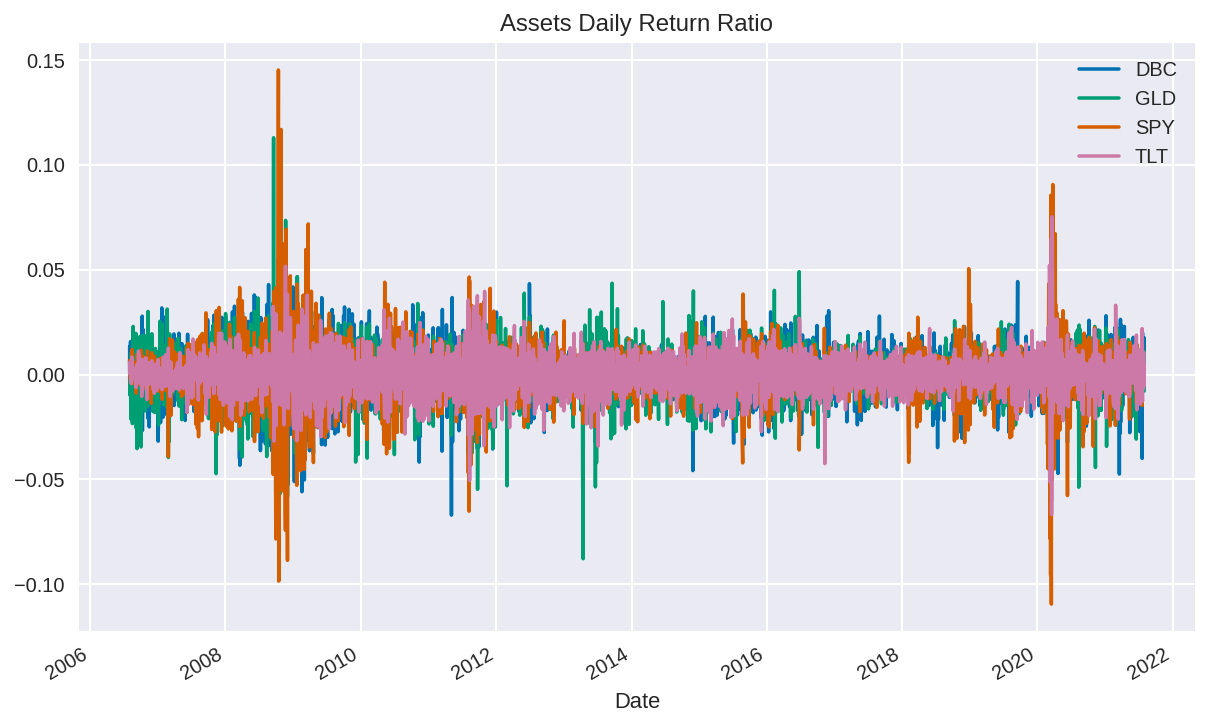

In [ ]:
# 데이터 다운로드
all_weather_mc= yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE, adjusted=True)

# 일별 수익률로 전환
returns_all_weather_mc = all_weather_mc['Adj Close'].pct_change().dropna()
avg_returns = returns_all_weather_mc.mean() * N_DAYS
cov_mat = returns_all_weather_mc.cov() * N_DAYS

# 각 자산의 일별 수익률 시각화
returns_all_weather_mc.plot(title='Assets Daily Return Ratio');

In [ ]:
# 난수 시드 설정
np.random.seed(77)

# 가중치 값 무작위 대입
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [ ]:
# 내적을 활용한 포트폴리오 지표계산
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [ ]:
# 데이터프레임으로 변경
portf_results_all_weather = pd.DataFrame({'returns': portf_rtns,'volatility': portf_vol,'sharpe_ratio': portf_sharpe_ratio})
portf_results_all_weather

,returns,volatility,sharpe_ratio
0,1.327160,0.593103,2.237657
1,1.707851,0.465510,3.668774
2,1.608142,0.407234,3.948935
3,1.121766,0.547920,2.047316
4,1.089662,0.456794,2.385458
...,...,...,...
99995,1.356877,0.471494,2.877824
99996,0.887025,0.569105,1.558631
99997,1.400969,0.442694,3.164646
99998,1.492396,0.417517,3.574458


In [ ]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

# 포트폴리오 수익률의 최대값과 최소값의 1차원 배열 생성
portf_rtns_ef = np.linspace(portf_results_all_weather.returns.min(), 
                            portf_results_all_weather.returns.max(), 
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

In [ ]:
for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

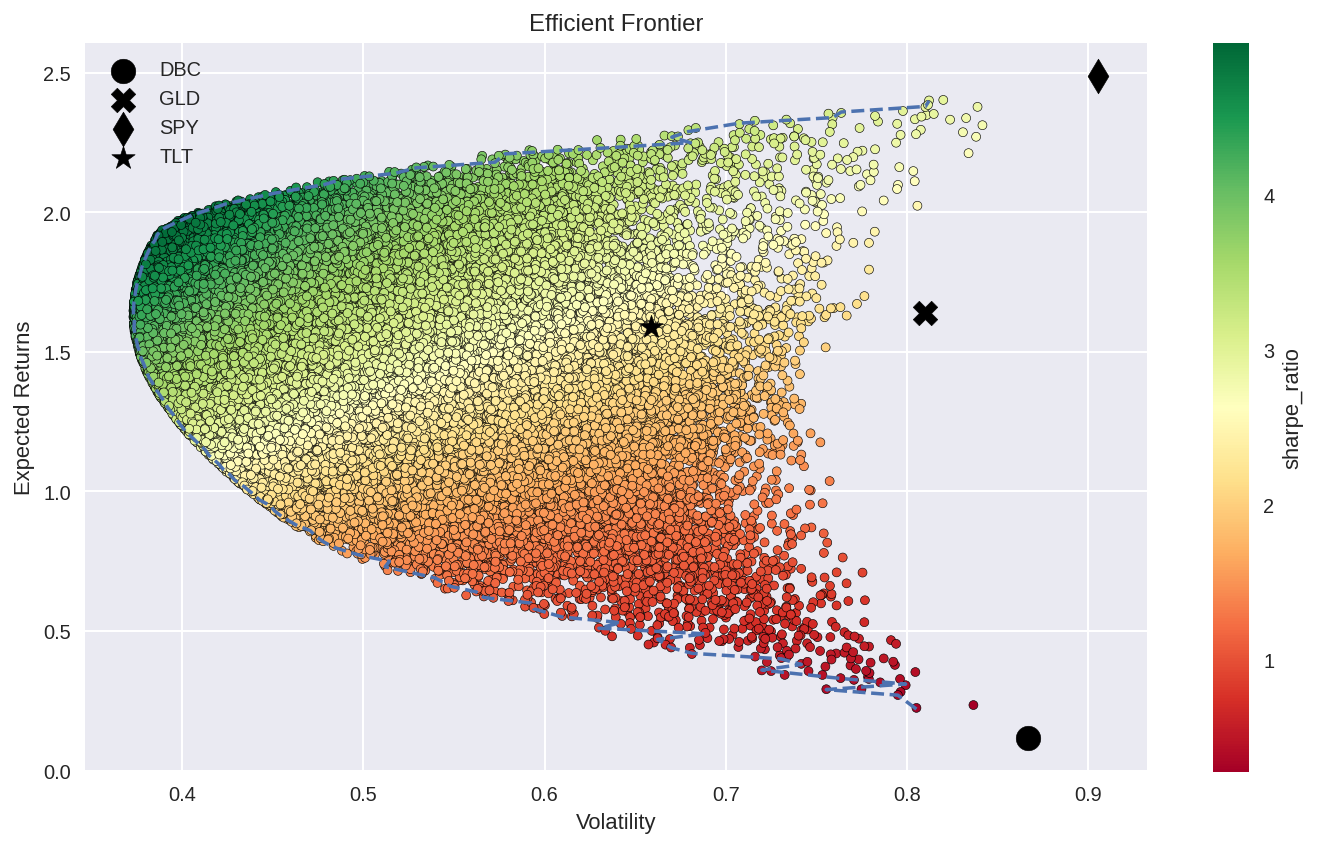

In [ ]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()
portf_results_all_weather.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=avg_returns[asset_index], 
                marker=MARKS[asset_index], 
                s=150, 
                color='black',
                label=RISKY_ASSETS[asset_index])
ax.legend()

plt.tight_layout()
# plt.savefig('images/ch7_im8.png')
plt.show()

위 그래프는 각 자산으로 구성된 포트폴리오가 최적의 효율을 발생시킬 수 있는 선을 보여줍니다.<br>
이제 저 라인에서 가장 샤프비율이 좋은 가중치 값을 찾아보겠습니다.

In [ ]:
max_sharpe_ind = np.argmax(portf_results_all_weather.sharpe_ratio)
max_sharpe_portf = portf_results_all_weather.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_all_weather.volatility)
min_vol_portf = portf_results_all_weather.loc[min_vol_ind]

In [ ]:
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmax(portf_results_all_weather.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
returns: 193.67% volatility: 38.89% sharpe_ratio: 498.03% 
Weights
DBC: 0.21% GLD: 12.92% SPY: 38.11% TLT: 48.75% 

몬테카를로 시뮬레이션으로 탐색한 최적의 자산배분비율은 다음과 같습니다.

대체자산(0.21%) / 골드(12.92%) / 주식(38.11%) / 국공채(48.75%)

해당 가중치로 포트폴리오 분석을 다시 실행합니다.

In [ ]:
# 개별 자산의 수익률 구하기
return_season = all_weather['Adj Close'].pct_change().dropna()

# 포트폴리오 가중치
# [0.0021, 0.1292, 0.3811, 0.4875] 

# 포트폴리오 수익률 계산
return_season['return_season'] = return_season['DBC']*0.0021 + return_season['GLD']*0.1292 + return_season['SPY'] * 0.3811 + return_season['TLT'] * 0.4875 

# 포트폴리오 백테스트 레포트 생성
qs.reports.metrics(return_season['return_season'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2006-08-01
End Period                 2021-07-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          296.27%
CAGR%                      9.61%

Sharpe                     1.11
Sortino                    1.61
Sortino/√2                 1.14

Max Drawdown               -16.3%
Longest DD Days            483
Volatility (ann.)          8.64%
Calmar                     0.59
Skew                       -0.13
Kurtosis                   8.31

Expected Daily %           0.04%
Expected Monthly %         0.77%
Expected Yearly %          8.99%
Kelly Criterion            10.02%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.86%
Expected Shortfall (cVaR)  -0.86%

Gain/Pain Ratio            0.22
Gain/Pain (1M)             1.5

Payoff Ratio               0.96
Profit Factor              1.22
Common Sense Ratio         1.17
CPC Index                  

앞선 테스트보다 더 좋은 결과를 얻었습니다. <br>
첫 테스트결과와 몬테카를로 분석을 적용한 후 테스트 결과를 비교해보겠습니다..<br>
<br>

- CAGR% (연평균수익률) : 8.65% => 9.61%  .<br>
- Sharpe (샤프지수) : 1.03 => 1.11 <br>
- Max drawdown(최대손실률) : -15.0% => -16.3% <br>
<br>

수익률과 최대손실률이 같이 올랐지만 포트폴리오 성능척도인 샤프지수는 0.08이 증가했습니다.<br>

**이유는 해당 기간동안 가격변화가 매우 둔했던 대체자산군을 종전 7.5%에서 0.2%로 낮춰서 운용했기 때문입니다.** <br>




## 3-2.  절대모멘텀 (Absolute Momentum) 포트폴리오 전략 

**절대모멘텀 (Absolute Momentum) 포트폴리오 전략**은 영구 포트폴리오를 기반으로 자산의 일부를 계속 변경(매수,매도)하는 전략입니다.<br>

네덜란드의 저명한 경제학자인 **'부터 J. 켈러'(Wouter Jacques Keller, 1948~)**가<br> **'Growth-Trend Timing and 60-40 Variations: Lethargic Asset Allocation (LAA), 2019'** 논문을 통해<br>
발표한 포트폴리오 투자전략으로 리스크 대비 수익이 매우 안정적이라는 것이 특징입니다. <br>이 논문에서 주장된 포트폴리오 전략을 구현하고 평가해보도록 하겠습니다.<br>
<br>

절대모멘텀 포트폴리오의 자산구성과 배분비율은 다음과 같습니다.

1. IWD : 25.0% / 미국 우량주 ETF
2. TLT : 25.0% / 미국 국공채 ETF
3. GLD : 25.0% / 금 ETF
4. Cash : 25.0% / 현금성 자산으로 상황에 따라 투자자산을 변경<br>
4-1) QQQ : 미국 나스닥 ETF<br>
4-2) SHY : 미국 단기 (만기 1-3년) 국공채 ETF

<br>



<참고자료>

- 절대모멘텀 전략 논문 : https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3498092

#### 1) 투자전략<br>
<br>
[주식, 국채, 금]<br>
3개 자산군에 25%씩 총 75%의 자산을 분배하고.<br>
나머지 25%의 자산은 경제상황에 유동적으로 보유종목을 변경합니다.<br>
<br>
- 호경기때는 성장주 종목인 '나스닥 ETF'를 매수하고<br>
- 불경기때는 '단기채권 ETF'를 매수함으로써<br> 
- 경제상황 변화에 따라 유동적으로 자산의 일부를 변경해나갑니다.<br>
- 호경기인지 불경기인지 여부는 "미국 실업률" 지표로 판단합니다.<br>
<br>
만약 해당월의 실업률이 최근 1년간 실업률 평균 대비 낮은 경우 <br>
호경기로 판단하고 나스닥 종목을 매입합니다.<br>
<br>
반면, 해당월의 실업률이 최근 1년간 실업률 평균 대비 높은 경우,<br>
불경기로 판단하고 나스닥 종목을 매도한 후 단기 국공채를 매수하게 됩니다. 

#### 2) 미국 실업률 다운로드 후 1년 이동평균값을 산출합니다.

In [ ]:
# 실업률 데이터 다운로드 (quandl 라이브러리 사용, FED 자료 다운로드에 유용합니다.)
'''
연방준비제도이사회 경제자료
api_url = https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data?keyword=unemployment%20usa&page=2

실업률
api_url = https://www.quandl.com/data/FRED/UNRATE-Civilian-Unemployment-Rate
'''

# 미국 실업률 지표 (1947.01 ~ 2021.07)
qd_unemployment = quandl.get('FRED/UNRATE')

# 실업률 1년 이동평균값 산출
qd_unemployment['moving_average'] = qd_unemployment['Value'].rolling(12).mean()

# 이동평균값이 없는 초기 12개 데이터 삭제
qd_unemployment = qd_unemployment.dropna()

# 테스트기간 데이터만 추출
qd_unemployment = qd_unemployment.loc[qd_unemployment.index >= '2006-07-31']

qd_unemployment.head()

,Value,moving_average
Date,,
2006-08-01,4.7,4.783333
2006-09-01,4.5,4.741667
2006-10-01,4.4,4.691667
2006-11-01,4.5,4.650000
2006-12-01,4.4,4.608333


#### 3) 주가데이터를 다운로드합니다.

In [ ]:
# 먼저 각 종목에 해당하는 데이터를 다운로드합니다.

tickers = ['IWD','TLT','GLD','QQQ','SHY']
start = datetime(2006,7,31)
end = datetime(2021,7,31)

# ## 우량주
# iwd = yf.download('SPY', start=start_date, end=end_date, progress=False)
# iwd = iwd.loc[:,['Adj Close']]

# ## 국공채
# tlt = yf.download('TLT', start=start_date, end=end_date, progress=False)
# tlt = tlt.loc[:,['Adj Close']]

# ## 골드 
# gld = yf.download('GLD', start=start_date, end=end_date, progress=False)
# gld = gld.loc[:,['Adj Close']]

# ## 나스닥
# qqq = yf.download('QQQ', start=start_date, end=end_date, progress=False)
# qqq = qqq.loc[:,['Adj Close']]

# ## 단기채
# shy = yf.download('SHY', start=start_date, end=end_date, progress=False)
# shy = shy.loc[:,['Adj Close']]

## 포트폴리오로 다운로드
absol_moment = yf.download(tickers, start=start, end=end, adjusted=True)
absol_moment = absol_moment.loc[:,['Adj Close']]

# 상위 컬럼인덱스 삭제
absol_moment.columns = absol_moment.columns.droplevel()
absol_moment.head()

[*********************100%***********************]  5 of 5 completed


,GLD,IWD,QQQ,SHY,TLT
Date,,,,,
2006-07-31,63.160000,52.404514,32.687096,63.977947,54.041698
2006-08-01,64.320000,52.327332,32.140862,64.017281,54.036644
2006-08-02,64.750000,52.607990,32.502102,64.017281,54.239010
2006-08-03,64.120003,52.664120,32.704735,64.009254,54.251621
2006-08-04,64.279999,52.671139,32.554951,64.065483,54.580448


#### 4) 일별수익률을 산출한 후 실업률 데이터와 병합합니다.

In [ ]:
# 일별수익률 산출
return_absol = absol_moment.pct_change().dropna()

# 실업률지표와 데이터결합
return_absol = pd.concat([return_absol,qd_unemployment],axis=1)

# 월별 실업률 데이터를 일별화하기 위해 결측치를 최근 발표된 값으로 대체합니다.
return_absol[['Value','moving_average']] = return_absol[['Value','moving_average']].fillna(method='ffill')

# 비영업일 주가데이터를 모두 삭제합니다.
return_absol = return_absol.dropna(0) 

#### 5) 투자전략 알고리즘 코드를 작성합니다.

In [ ]:
def select_asset(x):
    selected_asset = pd.Series([0,0], index=['ASSET','SELECT'])
    
    # 발표된 실업률이 1년 실업률 이동평균값보다 낮다면, 호경기로 판단하고 나스닥을 매수합니다.
    if x['Value'] < x['moving_average']:
        selected_momentum = x['QQQ']
        selected_asset['ASSET'] = x[x==selected_momentum].index[0][:3]
        selected_asset['SELECT'] = x[selected_asset['ASSET']]
        
    # 만약 실업률이 1년 이동평균보다 높다면, 불경기로 판단하고 단기채권을 매수합니다.
    else:
        selected_momentum = x['SHY']
        selected_asset['ASSET'] = x[x==selected_momentum].index[0][:3]
        selected_asset['SELECT'] = x[selected_asset['ASSET']]
        
    return selected_asset

#### 6) 투자알고리즘을 이용하여 데이터프레임에 포트폴리오 일별수익률을 산출합니다. 

In [ ]:
return_absol[['ASSET','SELECT']] = return_absol.apply(lambda x: select_asset(x), axis=1) 
return_absol['profit'] = return_absol['IWD']*0.25 + return_absol['TLT']*0.25 + return_absol['GLD']*0.25 + return_absol['SELECT']*0.25
return_absol['profit'].head()

Date
2006-08-01    0.000022
2006-08-02    0.006758
2006-08-03   -0.000549
2006-08-04    0.001027
2006-08-07   -0.000823
Name: profit, dtype: float64

#### 7) 포트폴리오 평가 분석

In [ ]:
qs.reports.metrics(return_absol['profit'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2006-08-01
End Period                 2021-07-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          351.67%
CAGR%                      10.57%

Sharpe                     1.2
Sortino                    1.74
Sortino/√2                 1.23

Max Drawdown               -14.34%
Longest DD Days            533
Volatility (ann.)          8.68%
Calmar                     0.74
Skew                       -0.25
Kurtosis                   4.21

Expected Daily %           0.04%
Expected Monthly %         0.84%
Expected Yearly %          9.88%
Kelly Criterion            10.55%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.86%
Expected Shortfall (cVaR)  -0.86%

Gain/Pain Ratio            0.23
Gain/Pain (1M)             1.67

Payoff Ratio               0.97
Profit Factor              1.23
Common Sense Ratio         1.23
CPC Index                

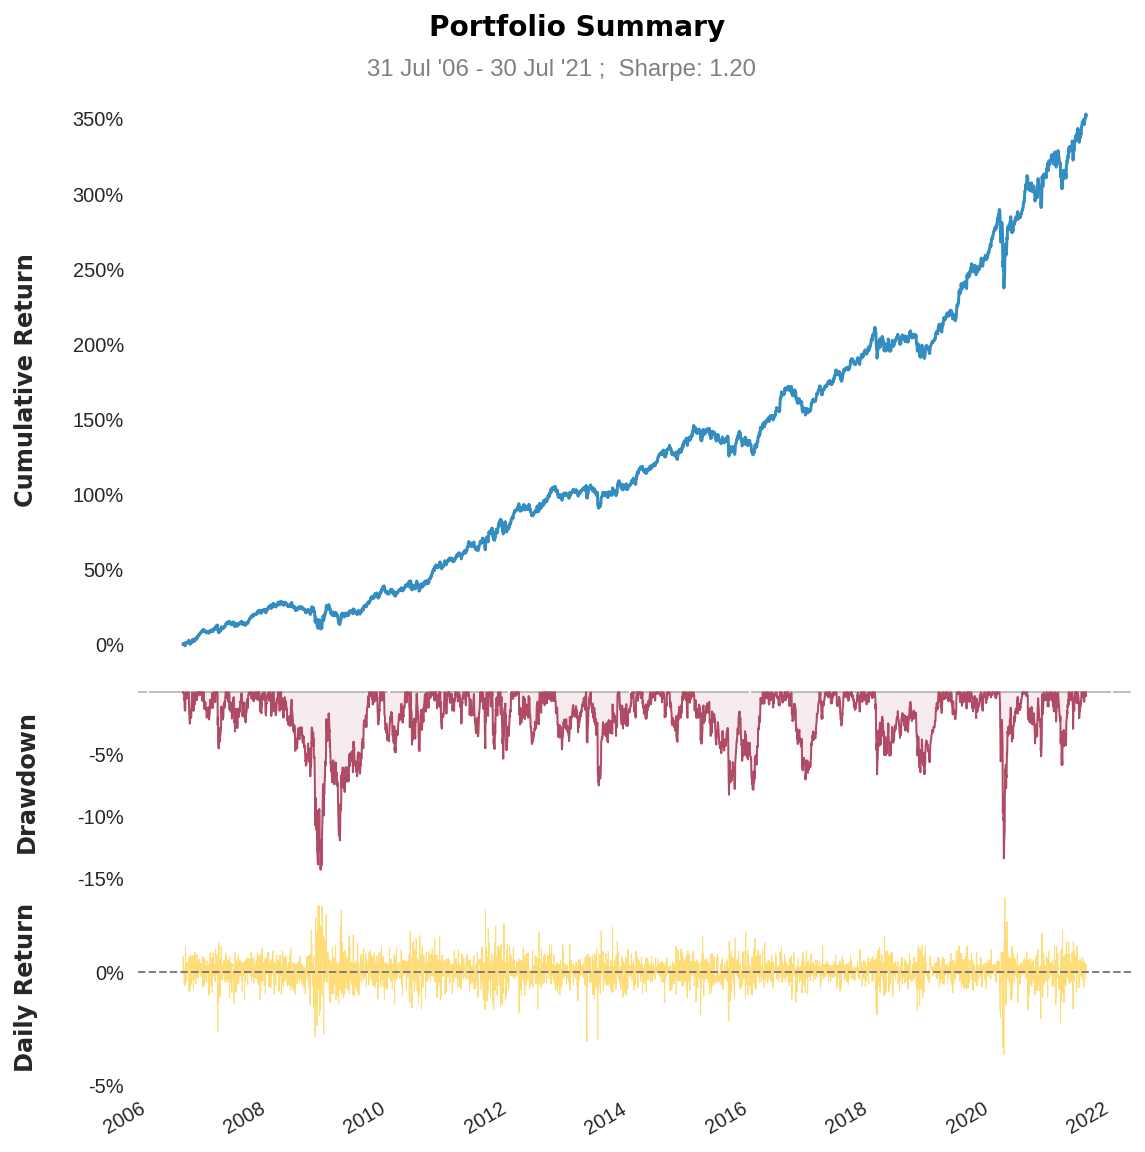

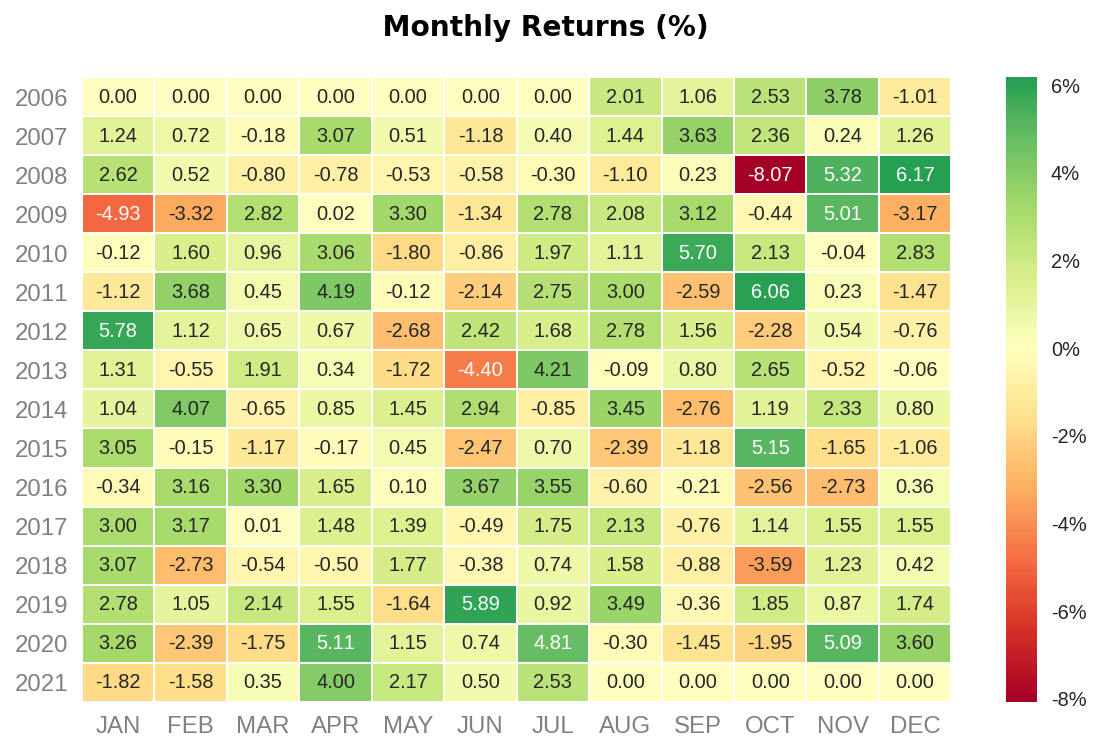

In [ ]:
qs.reports.plots(return_absol['profit'], mode='basic')

절대모멘텀 전략을 사용한 포트폴리오의 테스트 결과를 요약하면 다음과 같습니다. <br> 
<br>
연평균수익률 : 10.57% <br>
최대손실률 : -14.34% <br>
샤프지수 : 1.2 <br>
<br>
2-1 파트의 영적 포트폴리오보다 전체적인 평가수치가 더 우수한 것 평가할 수 있습니다.

## 3-3.  듀얼모멘텀 (Dual Momentum) 전략 

**듀얼모멘텀 (Dual Momentum) 전략**은 서로 다른 여러 종목들을 비교하여 상대적으로 모멘텀이 우위에 있는 종목을 매수하는 전략입니다.<br>

미국 월가의 40년 경력 투자전문가인 **'게리 안토나치(Gary Antonacci)'** 가<br>
**'Risk Premia Harvesting Through Dual Momentum, 2012'**  논문을 통해 발표한 투자전략 입니다.


#### 듀얼모멘텀의 투자종목은 다음과 같습니다.

1. VFINX : 미국 우량주 ETF
2. VINEX : 글로벌 성장주 ETF
3. VUSTX : 미국 장기국채 ETF
<br>


<img src="
https://img.hankyung.com/photo/201904/AA.19364873.4.jpg
" height="400px" width="1000px">

<참고자료><br>

- 듀얼모멘텀 전략 논문 : https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2042750
 

#### 1) 투자전략<br>
<br>
[미국 우량주, 글로벌 성장주 , 미국 장기국채]<br>
상기 3개의 종목 간 모멘텀(Momentum)을 비교하여 상대적으로 모멘텀이 뛰어난 종목을 매수하는 전략입니다.  <br>
<br>
모멘텀은 최근 3개월, 6개월, 12개월 간의 수익률의 합산치를 이용합니다.<br>

더욱 쉽게 설명하면 듀얼모멘텀은 3개 종목 중 **가장 "상승추세가 확실"하다고 판단되는 종목을 매수**하는 전략입니다. <br>
<br>
<br>
**투자알고리즘은 다음과 같습니다.**<br>
- Case1 : 미국우량주와 글로벌성장주의 모멘텀 합산치가 둘 다 0 이하인 경우 => 미국 장기국채 매수

- Case2 : Case1의 경우가 아닌 경우 => 미국 우량주와 글로벌 성장주 중에 모멘텀 합산치가 더 높은 종목을 매수

#### 2) 주가데이터를 다운로드합니다.

In [ ]:
# 먼저 각 종목에 해당하는 데이터를 다운로드합니다.

tickers = ['VFINX','VINEX','VUSTX']
start = datetime(2003,7,31)
end = datetime(2021,7,31)

## 포트폴리오로 다운로드
dual_moment_data = yf.download(tickers, start=start, end=end, adjusted=True)
dual_moment_data = dual_moment_data.loc[:,['Adj Close']]

# 상위 컬럼인덱스 삭제
dual_moment_data.columns = dual_moment_data.columns.droplevel()
dual_moment_data = dual_moment_data.dropna(0)
dual_moment_data.head()

[*********************100%***********************]  3 of 3 completed


,VFINX,VINEX,VUSTX
Date,,,
2003-07-31,65.069321,7.145307,5.906343
2003-08-01,64.401535,7.186930,5.922340
2003-08-04,64.579117,7.179993,5.948991
2003-08-05,63.435291,7.152245,5.885021
2003-08-06,63.556084,7.110620,5.986304


#### 3) 종목별 모멘텀(최근 수익률의 가중합)을 계산합니다.

In [ ]:
# 3개월간 누적수익률을 계산합니다.
month3 = dual_moment_data.pct_change(periods=20)
month3.columns = ['VFINX_3', 'VINEX_3', 'VUSTX_3']

# 6개월간 누적수익률을 계산합니다.
month6 = dual_moment_data.pct_change(periods=60)
month6.columns = ['VFINX_6', 'VINEX_6', 'VUSTX_6']

# 12개월간 누적수익률을 계산합니다.
month12 = dual_moment_data.pct_change(periods=240)
month12.columns = ['VFINX_12', 'VINEX_12', 'VUSTX_12']

In [ ]:
# 모멘텀(3개월, 6개월, 12개월 누적수익률의 합산치)을 산출합니다.
momentum = pd.concat([month3,month6,month12],axis=1)
momentum = momentum.dropna(0)

momentum['VFINX_total'] = month3['VFINX_3'] + month6['VFINX_6'] + month12['VFINX_12']
momentum['VINEX_total'] = month3['VINEX_3'] + month6['VINEX_6'] + month12['VINEX_12']
momentum['VUSTX_total'] = month3['VUSTX_3'] + month6['VUSTX_6'] + month12['VUSTX_12']

# 산출된 모멘텀만 추출합니다.
momentum_total = momentum[['VFINX_total','VINEX_total', 'VUSTX_total']]

# 날짜도 테스트 기간만 추출합니다.
momentum_total = momentum_total.loc[momentum_total.index >= '2006-07-31']
momentum_total

# 완성된 모멘텀 지수를 주가데이터에 병합합니다.
dual_moment = pd.concat([dual_moment_data, momentum_total],axis=1)
dual_moment = dual_moment.dropna(0)
dual_moment

,VFINX,VINEX,VUSTX,VFINX_total,VINEX_total,VUSTX_total
Date,,,,,,
2006-07-31,88.141899,14.385376,6.703106,0.191286,0.457799,0.068018
2006-08-01,87.744987,14.276944,6.703106,0.201945,0.471737,0.065686
2006-08-03,88.433929,14.363691,6.727865,0.229638,0.490209,0.089230
2006-08-07,88.126915,14.327546,6.752624,0.246654,0.520512,0.080034
2006-08-08,87.834846,14.313090,6.746435,0.210496,0.505418,0.061474
...,...,...,...,...,...,...
2021-07-19,393.309998,21.820000,13.090000,0.599225,0.504926,0.021540
2021-07-20,399.290009,21.950001,12.980000,0.728725,0.586001,-0.000749
2021-07-23,407.519989,22.570000,12.850000,0.975456,0.894322,-0.006887


#### 4) 투자전략 알고리즘 코드를 작성합니다.

In [ ]:
def select_dual(x):
    selected_asset = pd.Series([0,0], index=['ASSET','SELECT'])
    
    # 미국과 글로벌 모멘텀이 둘다 0 이하일 경우, 장기국채 매수
    if x['VFINX_total'] < 0 and x['VINEX_total'] < 0:
      selected_momentum = x['VUSTX_total']
      selected_asset['ASSET'] = x[x==selected_momentum].index[0][:5]
      selected_asset['SELECT'] = x[selected_asset['ASSET']]
    
    # 그 외에는 미국과 글로벌 중 모멘텀이 큰 자산을 매수
    else:
      selected_momentum = max(x['VFINX_total'], x['VINEX_total'])
      selected_asset['ASSET'] = x[x==selected_momentum].index[0][:5]
      selected_asset['SELECT'] = x[selected_asset['ASSET']]

    return selected_asset

#### 5) 투자알고리즘을 이용하여 데이터프레임에 포트폴리오 월별수익률을 산출합니다. 

일별데이터로 투자한다면<br>
너무 잦은 거래로 인한 거래비용이 발생할 수 있음으로<br> 재투자(Rebalancing)는 한달에 한번만 실행합니다.

In [ ]:
# 투자 알고리즘을 적용하여 종목을 매수합니다.
dual_moment[['ASSET','PRICE']] = dual_moment.apply(lambda x: select_dual(x), axis=1)

# 월말 데이터만 남김으로써 리밸런싱이 한달에 한번만 이루어지도록 합니다.
dual_moment = dual_moment.resample(rule='M').last()
dual_moment

# 각 자산군 별로 월별 수익률이 담긴 컬럼을 생성합니다.
return_col = [ticker + '_r' for ticker in tickers]
dual_moment[return_col] = dual_moment[tickers].pct_change()

# 선택한 자산에 맞춰 누적수익률을 계산합니다.
for i in range(len(dual_moment)):
    strat_return = 0
    strat_return = dual_moment[dual_moment.iloc[i]['ASSET']+'_r'].iloc[i]
    dual_moment.loc[dual_moment.index[i], 'RETURN'] = strat_return

dual_moment = dual_moment.iloc[1:] 

In [ ]:
dual_moment

,VFINX,VINEX,VUSTX,VFINX_total,VINEX_total,VUSTX_total,ASSET,PRICE,VFINX_r,VINEX_r,VUSTX_r,RETURN
Date,,,,,,,,,,,,
2006-08-31,90.223717,14.725133,6.886531,0.293882,0.635002,0.106680,VINEX,14.725133,0.023619,0.023618,0.027364,0.023618
2006-09-30,92.535599,14.992599,6.995413,0.337521,0.552970,0.162601,VINEX,14.992599,0.025624,0.018164,0.015811,0.018164
2006-10-31,95.543900,15.462474,6.970454,0.348371,0.538612,0.155590,VINEX,15.462474,0.032510,0.031340,-0.003568,0.031340
2006-11-30,97.341370,16.243189,7.184414,0.339609,0.567804,0.213613,VINEX,16.243189,0.018813,0.050491,0.030695,0.050491
2006-12-31,99.151291,15.647777,7.001971,0.421121,0.466140,0.115758,VINEX,15.647777,0.018594,-0.036656,-0.025394,-0.036656
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,365.589142,20.940001,11.741026,0.416490,0.305613,-0.404876,VFINX,365.589142,0.043689,0.012083,-0.074441,0.043689
2021-04-30,385.048401,22.010000,12.019708,0.512366,0.367679,-0.191253,VFINX,385.048401,0.053227,0.051098,0.023736,0.053227
2021-05-31,387.700134,22.299999,12.039675,0.486881,0.429144,-0.231851,VFINX,387.700134,0.006887,0.013176,0.001661,0.006887


#### 6) 포트폴리오 평가 분석

In [ ]:
qs.reports.metrics(dual_moment['RETURN'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2006-08-31
End Period                 2021-07-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          2,360.65%
CAGR%                      23.94%

Sharpe                     7.14
Sortino                    14.62
Sortino/√2                 10.34

Max Drawdown               -14.18%
Longest DD Days            366
Volatility (ann.)          66.36%
Calmar                     1.69
Skew                       0.06
Kurtosis                   0.82

Expected Daily %           1.8%
Expected Monthly %         1.8%
Expected Yearly %          22.16%
Kelly Criterion            49.53%
Risk of Ruin               0.0%
Daily Value-at-Risk        -5.0%
Expected Shortfall (cVaR)  -5.0%

Gain/Pain Ratio            2.3
Gain/Pain (1M)             2.3

Payoff Ratio               1.34
Profit Factor              3.3
Common Sense Ratio         6.23
CPC Index                 

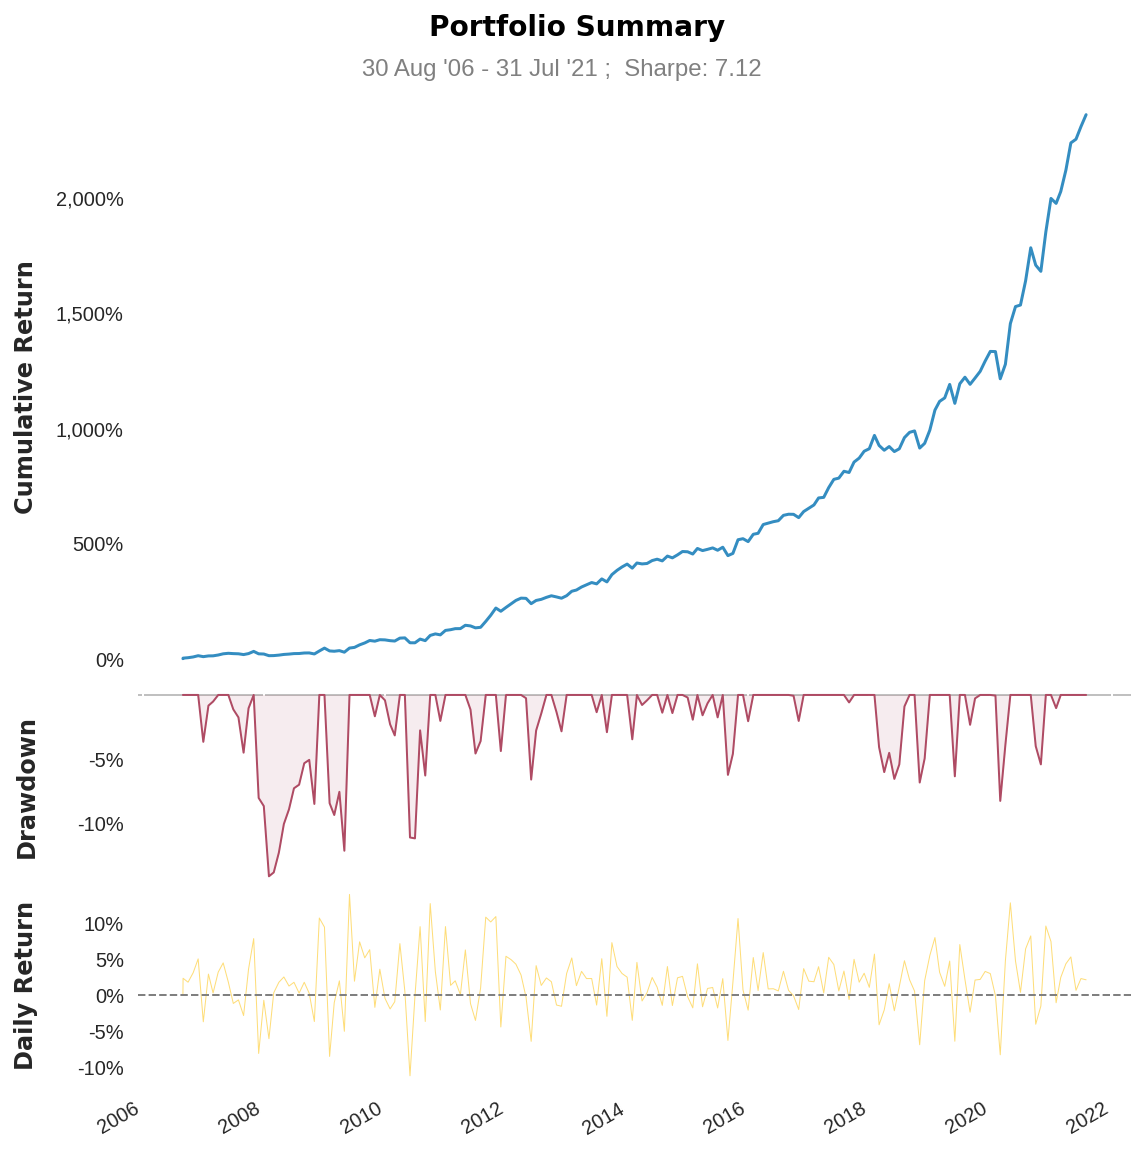

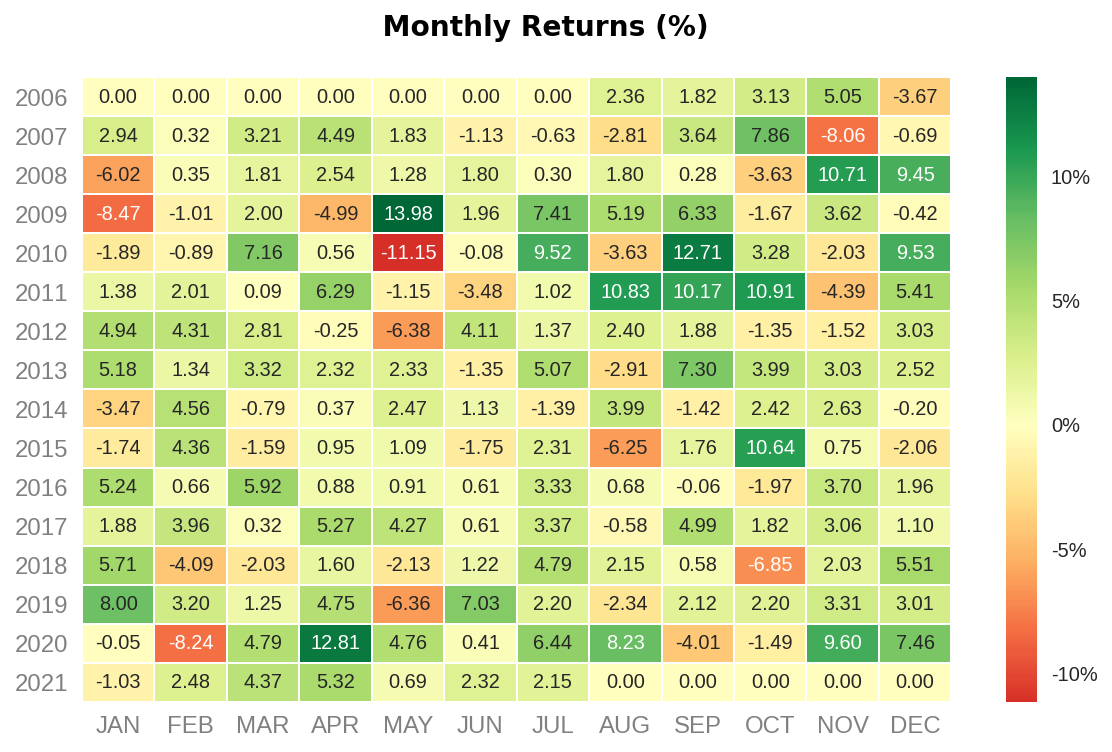

In [ ]:
qs.reports.plots(dual_moment['RETURN'], mode='basic')

듀얼모멘텀 전략을 사용한 백테스트 결과를 요약하면 다음과 같습니다. <br> 
<br>
연평균수익률 : 23.94% <br>
최대손실률 : -14.18% <br>
샤프지수 : 7.14 <br>
<br>
앞서 다뤘던 포트폴리오 전략들보다 압도적으로 뛰어난 전략으로 평가됩니다. <br>
<br> 
특히, 매달 자산군이 리밸런싱 됨에도 불구하고<br>
거래횟수가 10번 미만이라는 점에서 거래수수료를 감안하지 않아도 비슷한 실적이 나올것으로 추측됩니다.<br>
<br>





# Part4. 결론

이제까지 3가지 투자전략을 직접 구현해보고 테스트 하였습니다.<br>
그 결과는 다음과 같습니다.


|전략 비교|영구 포트폴리오|절대 모멘텀 전략 |듀얼 모멘텀 전략|
|------:|---:|---:|---:|
|연평균수익률|9.61%|10.57%|23.94%|
|최대손실률|-16.30%|-14.34%|-14.18%|
|샤프지수|1.11|1.20|7.14|

제가 구현하고 설계한 3가지 전략은 현재 국내 시중펀드와 비교해도 매우 수익성이 좋고 안정성 있는 전략이라고 생각합니다.<br>
<br>
현재 시중 펀드 5000개 중 연평균 수익률 20% 이상은 "약 900개 정도(전체의 18%)" 이며<br>
이 중 10년 이상 장기간 동안 해당 실적을 유지한 펀드는 "단 15개(전체의 0.3%)" 뿐 입니다.<br><br>

<출처><br>
대신증권 펀드랭킹 = https://www.daishin.com/g.ds?p=1562&v=1049&m=1697<br>
<br>
<br>
<br>
듀얼모멘텀 전략을 통해 얻은 24%의 수익률은<br>
현존하는 투자의 대가인 "워렌버핏"의 연평균수익률(약 22%) 상회하는 수치입니다.<br>
<br>
그러나 제가 개발한 알고리즘이 앞에서 언급한 시중 펀드나 워렌버핏 경보다 뛰어나다고 보긴 어렵습니다.<br>
이유는 다음과 같습니다.<br>




**4-1) 과거데이터만으로 이루어진 퀀트 테스트**

저의 프로젝트의 가장 큰 헛점은 검증에 활용된 모든 데이터가 과거데이터에 기반한다는 것 입니다.<br>
지금까지 많은 펀드상품과 투자알고리즘이 개발되었고 시험단계에서 엄청난 성적을 거두었지만,<br>
그 중 살아남은 상품은 소수인 이유가 바로 여기에 있습니다.<br>
<br>
더 급변해진 금융시장에서 테스트 결과가 실전투자 결과와 동일하리라는 보장은 없으며<br> 저는 다음과 같은 과업이 추가되었다면 프로젝트가 더욱 성공적이었다고 생각합니다.
<br><br>
- 몬테카를로 알고리즘을 이용한 무작위 시계열 주가데이터를 생성해서 테스트
- 추세가 빠르고 비슷한 금융상품(선물, 옵션)을 이용한 실전 테스트
- 이러한 테스트 과정에서 이루어져야하는 피드백과 전략개선 <br>
<br>

저의 핵심 주장은 **프로젝트 백테스트의 결과를 절대 있는 그대로 받아들여선 안된다**는 것 입니다.

**4-2) 지역에 따른 수익률 함정**

두번째는 모든 금융시장에 적용되지 않는다는 단점입니다.<br>
처음에 KOSPI 시장을 대상으로 몇개의 전략을 적용하였으나 결과가 매우 좋지 않았습니다.
<br> 그 이유는 국내 자본시장은 내수보다 수출입중심으로 이루어져있어<br> 
환율이나 유가 같은 변수들로 인해 퀀트투자 시에 고려해야할 사항이 더 많았습니다.<br>

투자전략은 반드시 보편적이지 않을 뿐더러,<br> 
지역에 따른 특성을 고려한 퀀트전략이 요구된다는 것이 저의 견해 입니다.

**4-3) 세금 부과를 고려하지 않음**

마지막으로 해당 백테스팅 결과값은 세금을 고려하지 않았다는걸 지적하고 싶습니다.<br>
대한민국 국민은 2023년부터 개인투자자를 기준으로 3억원 이하는 투자수익의 20%, 3억원 이상은 25%의 금융투자소득세가 부과됩니다.<br>
<br>
따라서, 저는 이번 프로젝트를 통해 얻은 투자전략을 효율적으로 사용하기 위해선, 장기적으로 투자할 수 있으며 비과세혜택이 있는 퇴직연금 계좌에서 운용하는 것이 가장 이상적이라고 결론 내리겠습니다.<br>